# 6.3 Geographic Visualization

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/faridchehraz/Desktop/Python/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/faridchehraz/Desktop/Python/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
#Set OS Path

path = r'/Users/faridchehraz/Desktop/Python/Master - USA Wildfires'

In [6]:
#Import US_wildfires pkl file

df = pd.read_pickle(os.path.join(path, '2. Data', 'b. Prepared Data', 'US_wildfires.pkl'))

In [7]:
df.head()

,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME,DISC_MONTH,DISC_DOW
0,1,2005,2005-02-02,33,Power generation/transmission/distribution,0.10,A,40.036944,-121.005833,USFS,CA,63,Plumas County,2,Wednesday
1,2,2004,2004-05-12,133,Natural,0.25,A,38.933056,-120.404444,USFS,CA,61,Placer County,5,Wednesday
2,3,2004,2004-05-31,152,Debris and open burning,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,El Dorado County,5,Monday
3,4,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.913333,USFS,CA,3,Alpine County,6,Monday
4,5,2004,2004-06-28,180,Natural,0.10,A,38.559167,-119.933056,USFS,CA,3,Alpine County,6,Monday


### 2. Data wrangling

##### Create subset with required columns

In [8]:
df_states_fire_size = df[["FIRE_SIZE", "STATE"]]

In [9]:
df_states_fire_size.head()

,FIRE_SIZE,STATE
0,0.10,CA
1,0.25,CA
2,0.10,CA
3,0.10,CA
4,0.10,CA


In [10]:
df_states_fire_size.shape

(2166753, 2)

In [11]:
df_states_fire_size.dtypes

FIRE_SIZE    float64
STATE         object
dtype: object

### 3. Conduct consistency checks

In [12]:
# Check for missing values

df_states_fire_size.isnull().sum()

FIRE_SIZE    0
STATE        0
dtype: int64

##### Duplicates check

In [13]:
dups = df_states_fire_size.duplicated()

In [14]:
dups.shape # no dups

(2166753,)

##### Extreme values checks

<AxesSubplot:xlabel='FIRE_SIZE', ylabel='Count'>

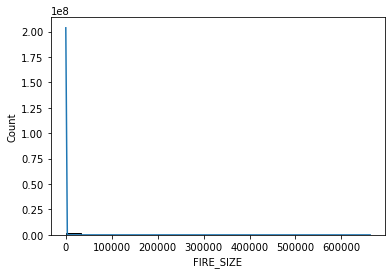

In [15]:
sns.histplot(df_states_fire_size['FIRE_SIZE'], bins=20, kde = True) # shows extreme values for 'FIRE_SIZE'

In [16]:
# Check how many extreme values

df_states_fire_size[df_states_fire_size['FIRE_SIZE'] >500000]

,FIRE_SIZE,STATE
211267,606945.0,AK
305530,537627.0,AK
1214260,517078.0,AK
1458491,538049.0,AZ
1578391,558198.3,OR
2042982,662700.0,OK


Will not delete or restate on the assumption that the recorded fires are correct

### 4. Plotting a choropleth

In [17]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_states_fire_size,
    columns = ['STATE', 'FIRE_SIZE'],
    key_on = 'feature.id', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Fire Size").add_to(map)
folium.LayerControl().add_to(map)



map

In [18]:
map.save('plot_data.html')

- Does the analysis answer any of your existing research questions?
    - Where do most fires ocurr?
    - Although not answered the exact question, the map does show the states with the largest fire areas. We can see Oregon, Nevada, Alaska and New Mexico are the states with the largest fire areas.
    

- Does the analysis lead you to any new research questions?
    - Would be interested to find out :
        - What the map looks like year on year since 1992
        - The main causes of wildfires for the above-mentioned states.
        - What type of land do the fires ocurr on for above-mentioned states